#### Dataset is downloaded from here: https://www.kaggle.com/amitabhajoy/bengaluru-house-price-data



In [493]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20, 10)

In [494]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [495]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [496]:
df1.shape

(13320, 9)

In [497]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

### DATA CLEANING

#### DROP columns used with new df called df2

In [500]:
df2 = df1.drop(['area_type', 'society', 'balcony', 'availability'], axis='columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [501]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

-- Since there are 13320 rows, the amount of null values is pretty much less compared to the rows from the dataframe.

-- Drop the 73 rows from ['bath']

In [503]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [504]:
df3.shape

(13246, 5)

In [505]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

### Converting text like "2 BHK" and "4 Bedroom" into just the numbers 2 and 4, storing these numbers in a new 'bhk' column. 

In [507]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

/var/folders/zp/cw6162y95ynbbzgy5bwjwtp80000gn/T/ipykernel_5647/2222900254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [508]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [509]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [510]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [511]:
 df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

#### Identifies rows in the 'total_sqft' column that contain values that are not standard numerical representations of square footage 

#### (e.g., ranges like "2100-2850").

In [513]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [514]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


import re  
unique_sqfts = df3['total_sqft'].unique()

for sqft in unique_sqfts:
    if re.search(r'[a-zA-Z]', str(sqft)):  
        print(f"Potential non-numeric value: {sqft}")

In [516]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None   

import re  

    # Conversion factors to sqft
    conversions = {
        "Sq. Meter": 10.764,     # 1 Sq. Meter = 10.764 Sq. Feet
        "Acres": 43560,          # 1 Acre = 43,560 Sq. Feet
        "Sq. Yards": 9,          # 1 Sq. Yard = 9 Sq. Feet
        "Cents": 435.6,          # 1 Cent = 435.6 Sq. Feet
        "Guntha": 1089,          # 1 Guntha = 1089 Sq. Feet
        "Grounds": 2400,         # 1 Ground = 2400 Sq. Feet
        "Perch": 272.25          # 1 Perch = 272.25 Sq. Feet
    }

    # Extract numeric value
    num_match = re.findall(r'\d+\.\d+|\d+', x)  # Extracts numeric values
    if num_match:
        num_value = float(num_match[0])  # Take the first numeric value

        # Check for unit and convert
        for unit, factor in conversions.items():
            if unit in x:
                return num_value * factor  # Convert to sqft
        
        return num_value  # If no unit, return the numeric value as sqft

    return None  # Return None if not a valid number


-- convert_sqft_to_num('2100-2850')

-- tokens becomes ['2100', '2850'].

-- len(tokens) is 2, so the if condition is True.

-- (float('2100') + float('2850')) / 2 is calculated, which is 2475.0


In [519]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)

In [520]:
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [521]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [522]:
df4['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13246, dtype: float64

### Feature Engineering


-- Adding new feature called price per square feet



In [525]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [526]:
39.07/1056.0	

0.03699810606060606

In [527]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    1.320000e+04
mean     7.920759e+03
std      1.067272e+05
min      2.678298e+02
25%      4.267701e+03
50%      5.438331e+03
75%      7.317073e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

In [528]:
df5.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [529]:
len(df5.location.unique())

1304

### Apply dimensionality reduction technique here to reduce number of locations

-- Before applying strip(), you likely had multiple entries that looked like the same location but 

-- had different amounts of leading or trailing whitespace.

-- For example:
-- "Whitefield"
-- " Whitefield"


-- By applying strip(), you are removing the extra whitespace and standardizing the location names.

-- This causes locations that were previously considered different due to whitespace to be treated as the same location.

In [532]:
df5.location = df5.location.apply(lambda x: x.strip())


In [533]:
location_stats = df5['location'].value_counts(ascending=False)
location_stats

location
Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: count, Length: 1293, dtype: int64

In [534]:
len(location_stats[location_stats <= 10])


1052

In [535]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

location
Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: count, Length: 1052, dtype: int64

In [536]:
len(df5.location.unique())

1293

#### Any location having less than 10 data points will be tagged as "other"

In [538]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)


In [539]:
len(df5.location.unique())

242

In [540]:
df5.head(10)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


## Removal Outlier 

-- Normally square ft per bedroom is 300 (i.e. 2 bhk apartment is minimum 600 sqft. 

-- If you have for example 400 sqft apartment with 2 bhk than that seems suspicious and can be removed as an outlier.

-- We will remove such outliers by keeping our minimum thresold per bhk to be 300 sqft.

In [543]:
df5[df5.total_sqft/df5.bhk<300]


,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,9043.927649


-- 45	HSR Layout	8 Bedroom	600.0	9.0	200.0	8	33333.333333

-- Suppose , you have 600.0	total_sqft home but the total number of bhk is 8 which deviates from the threhold.

In [545]:
df5.shape

(13246, 7)

In [546]:
# Negate

df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(12502, 7)

## Outlier Removal Using Standard Deviation and Mean


In [548]:
df6.price_per_sqft.describe()


count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

-- Found that min price per sqft is 267 rs/sqft whereas max is 176470, this shows a wide variation in property prices. 

-- We should remove outliers per location using mean and one standard deviation

In [550]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

1.Group by Location:
The code first groups your data by the 'location' column. This means it will perform the outlier removal process independently for each unique location.

2.Calculate Mean and Standard Deviation:
For each location, it calculates the mean (average) and standard deviation (spread) of the 'price_per_sqft' values.


3.Identify Outliers:
It then identifies outliers as those 'price_per_sqft' values that fall outside of one standard deviation from the mean.

In other words, it keeps only the data points where:
The 'price_per_sqft' is greater than (mean - standard deviation).
AND the 'price_per_sqft' is less than or equal to (mean + standard deviation).


4.Create a New DataFrame:

It creates a new DataFrame (df_out) that contains only the rows that are not considered outliers for each location.


5.Combine Results:

It combines the results from each location into a single DataFrame (df_out).
Return the Cleaned DataFrame:

Finally, it returns the cleaned DataFrame (df_out), which has the outliers removed.

In [552]:
df7 = remove_pps_outliers(df6)
df7.shape

(10241, 7)

#### Checking if for a given location how does the 2 BHK and 3 BHK property prices look like



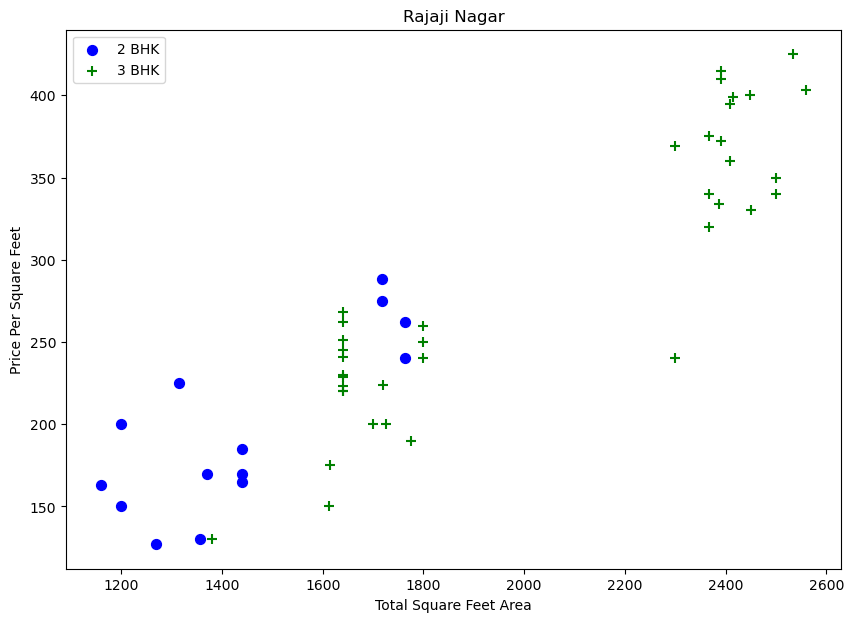

In [554]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (10, 7)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet")
    plt.title(location)
    plt.legend()
    plt.show() 

plot_scatter_chart(df7, "Rajaji Nagar")

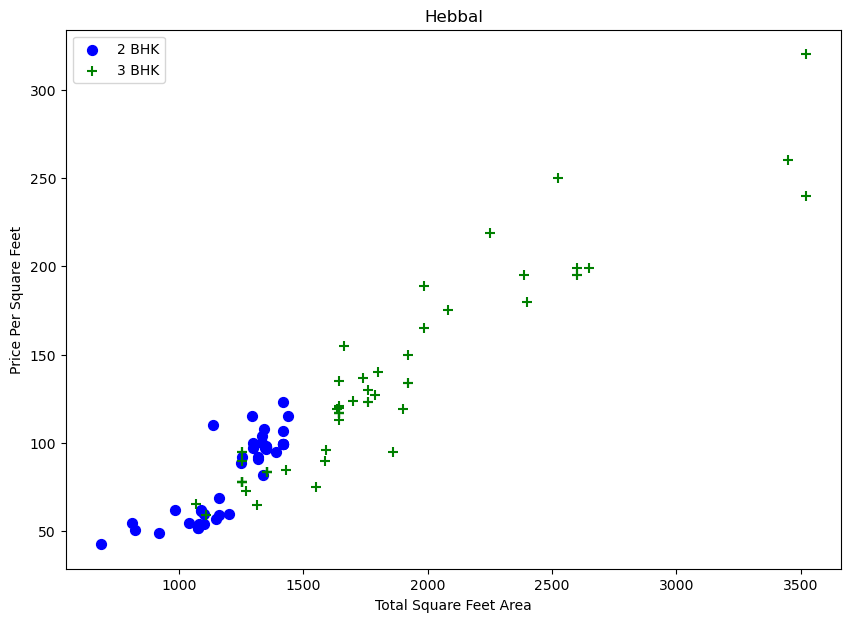

In [555]:
plot_scatter_chart(df7,"Hebbal")


## Outlier Removal: Price vs. BHK

**Problem:** We need to address a scenario where, within the same location, a 3-bedroom apartment might be priced lower than a 2-bedroom apartment (for similar square footage). This is likely an error or outlier.

**Solution:** We will remove these inconsistencies by comparing the `price_per_sqft` across different BHK configurations within each location.

**Methodology:**

1.  **Location-Based Analysis:** We will analyze data for each location separately.

2.  **BHK Statistics Dictionary:** For each location, we will create a dictionary that stores key statistics (mean, standard deviation, count) of `price_per_sqft` for each BHK type.

    **Example Dictionary:**

    ```
    {
        '1': {
            'mean': 4000,
            'std': 2000,
            'count': 34
        },
        '2': {
            'mean': 4300,
            'std': 2300,
            'count': 22
        }
    }
    ```

3.  **Outlier Removal:** We will remove entries where, for example, a 2 BHK apartment has a `price_per_sqft` that is less than the mean `price_per_sqft` of a 1 BHK apartment in the same location.

**Why This Approach?**

* **Logical Consistency:** Ensures that larger apartments are not priced lower than smaller apartments in the same area.
* **Data Accuracy:** Improves the overall accuracy and reliability of our dataset.


In [557]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape

(7329, 7)

#### check for improvement 

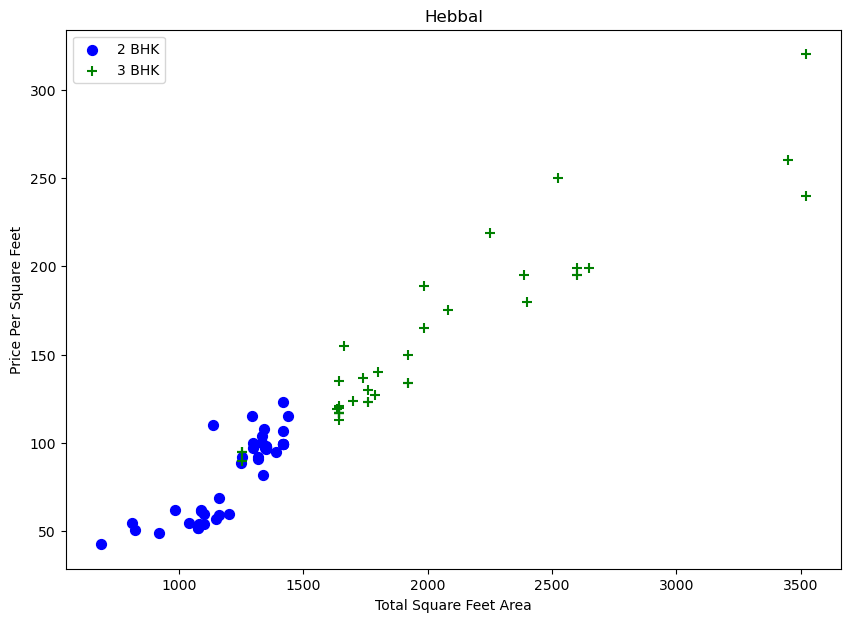

In [559]:
plot_scatter_chart(df8,"Hebbal")


Text(0, 0.5, 'Count')

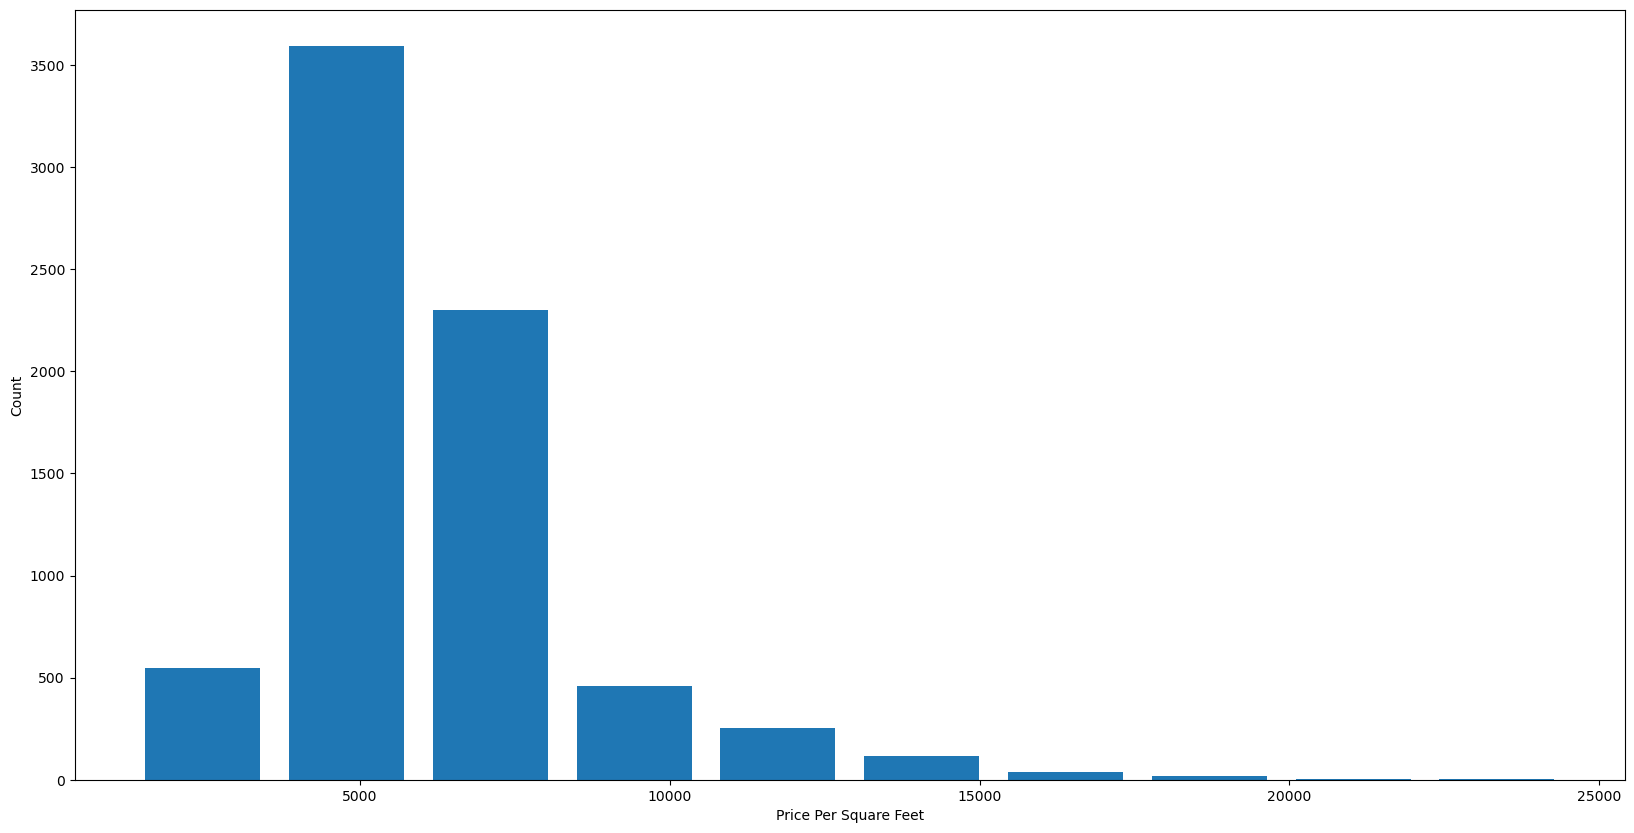

In [560]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

**Observations:**

* The histogram shows the frequency distribution of 'price_per_sqft' values after outlier removal.
* The x-axis represents the price per square foot, and the y-axis represents the count of properties falling within each price range.
* The distribution appears to be right-skewed, indicating that there are more properties with lower prices per square foot and fewer properties with very high prices per square foot.
 

### Outlier Removal Using Bathrooms Feature


In [563]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [564]:
len(df8.bath.unique())

12

In [565]:
df8[df8.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


#### It is unusual to have 2 more bathrooms than number of bedrooms in a home



Text(0, 0.5, 'Count')

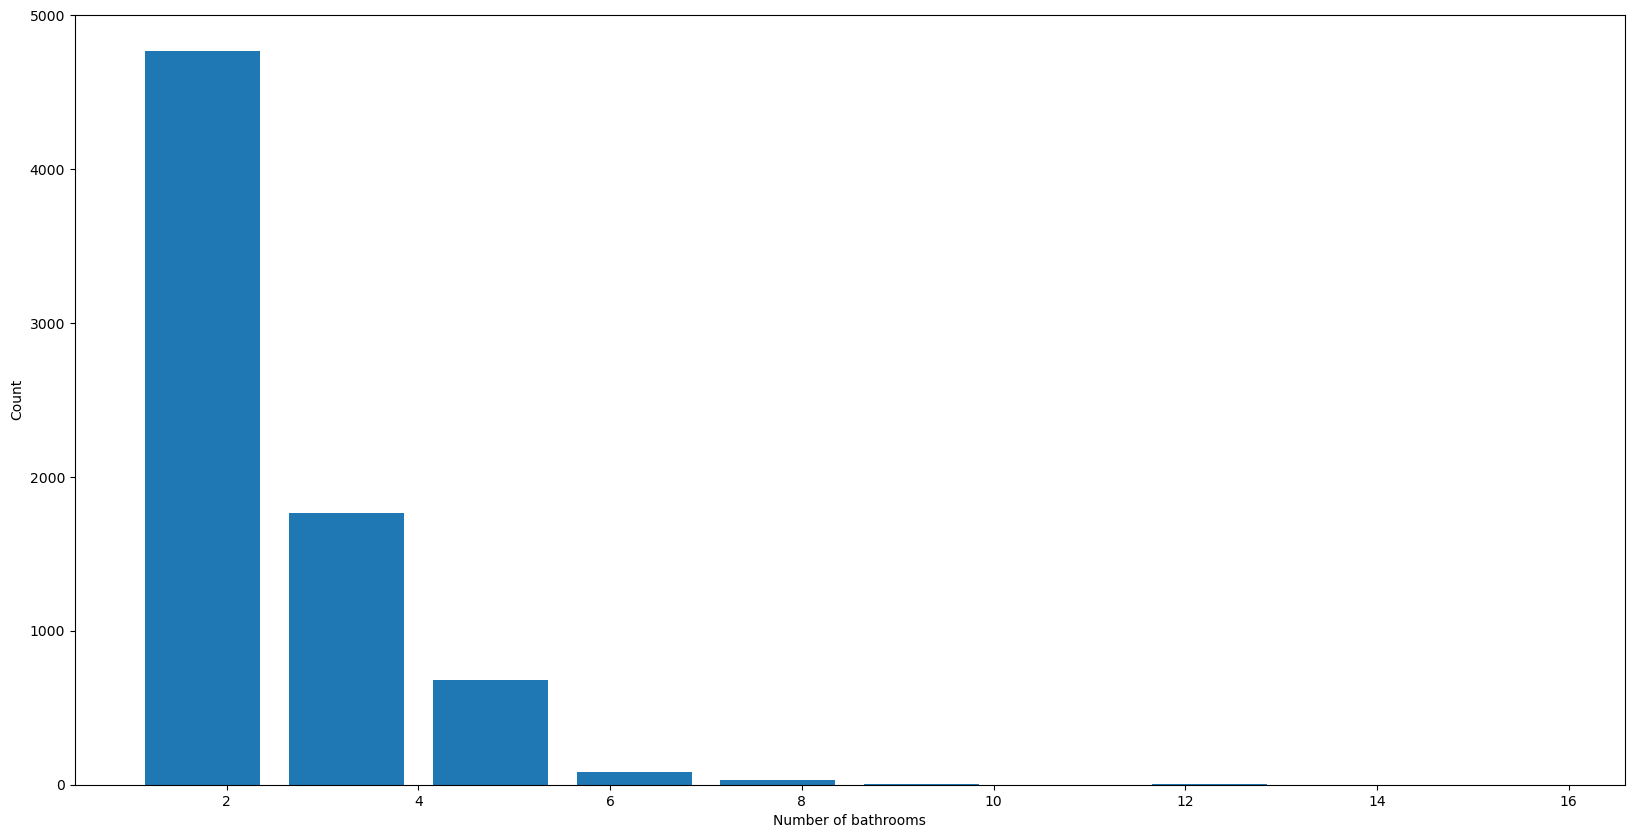

In [567]:
plt.hist(df8.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [568]:
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


## Why add +2?

- Normally, the number of bathrooms (`bath`) is close to the number of bedrooms (`bhk`).
- But in some cases, properties may have **too many bathrooms** compared to bedrooms, which could indicate **data inconsistencies** or **luxury properties** with extra bathrooms.
- The `+2` condition **helps identify unusual cases** where a house has significantly more bathrooms than expected.

### Example Breakdown:

| location     | bhk | bath | Condition (`bath > bhk + 2`)? |
|-------------|-----|------|----------------|
| Chikkabanavar | 4  | 7    | ✅ (7 > 4+2 = 6) |
| Nagasandra   | 4  | 8    | ✅ (8 > 4+2 = 6) |
| Thanisandra  | 3  | 6    | ✅ (6 > 3+2 = 5) |
| other        | 6  | 9    | ✅ (9 > 6+2 = 8) |

In [570]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(7251, 7)

In [571]:
df9.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [572]:
df10 = df9.drop(['size','price_per_sqft'],axis='columns')
df10.head(8)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
8,1st Phase JP Nagar,1875.0,3.0,167.0,3


In [573]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7251 entries, 0 to 10240
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7251 non-null   object 
 1   total_sqft  7251 non-null   float64
 2   bath        7251 non-null   float64
 3   price       7251 non-null   float64
 4   bhk         7251 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 339.9+ KB


### Use One Hot Encoding For Location

In [575]:
dummies = pd.get_dummies(df10.location).astype(int)
dummies.head(10)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### How to Identify Rows That Belonged to "Other"?

##### **1. Check for Rows with All Zeros**
After dropping the "other" column, each row should have exactly one `1` in the category columns. If a row contains only `0`s, it likely belonged to the "other" category.


In [577]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [578]:
df12 = df11.drop('location',axis='columns')
df12.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [579]:
df12.shape

(7251, 245)

## Build a Model

#### price = dependent variable 

In [582]:
X = df12.drop(['price'],axis='columns')
X.head()


,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [583]:
X.shape


(7251, 244)

In [584]:
y = df12.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [585]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [586]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)  # for model training 
lr_clf.score(X_test,y_test)  # to evaluate the score of the model 

0.8452277697874319

## Use K Fold cross validation to measure accuracy of our LinearRegression model


In [588]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0) # to randomize the sample 

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

-- We can see that in 5 iterations we get a score above 80% all the time. 

-- This is pretty good but we want to test few other algorithms for regression to see if we can get even better score. 

-- We will use GridSearchCV for this purpose

## Find best model using GridSearchCV

#### This should tell me which alogithm is the best 


In [597]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {}  # Removed 'normalize' since it's deprecated
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],  # 'mse' is replaced with 'squared_error'
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, y)

,model,best_score,best_params
0,linear_regression,0.818354,{}
1,lasso,0.687450,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.720606,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


#### Among the above results we can say that LinearRegression gives the best score. Hence we will use that.

In [601]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [605]:
np.where(X.columns=='5th Block Hbr Layout')[0][0] # column index

7

## Test the model for few properties

In [607]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [611]:
predict_price('1st Phase JP Nagar',1000, 2, 2)


/Users/kyawphonezaw/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677176052

-- estimated price 

In [614]:
predict_price('1st Phase JP Nagar',1000, 3, 3)


/Users/kyawphonezaw/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.8051939520265

In [622]:
predict_price('Indira Nagar',1000, 2, 3)


/Users/kyawphonezaw/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


179.50527707582478

In [620]:
predict_price('Whitefield',1000, 2, 2)


/Users/kyawphonezaw/anaconda3/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


53.3583880977578

### Export the tested model to a pickle file


In [626]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

### Export location and column information to a file that to be used on in the prediction application

In [629]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))